In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This line is used to unzip the dataset
!unzip "drive/MyDrive/Traffic signs/archive (12).zip" -d "drive/MyDrive/Traffic signs"

Archive:  drive/MyDrive/Traffic signs/archive (12).zip
replace drive/MyDrive/Traffic signs/signname.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Traffic signs/signname.csv  
  inflating: drive/MyDrive/Traffic signs/test.p  
  inflating: drive/MyDrive/Traffic signs/train.p  
  inflating: drive/MyDrive/Traffic signs/valid.p  


In [3]:
# Importing the necessary Libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

In [4]:
#PHASE 1 Data Loading and Preprocessing
# The image was saved in a pickle file and as a result we will be using the pickle library to load out this data
# The dataset is divided into three categories the train.p, the valid.p and the test.p for training, validation and testing respectively
# Below we define the file paths (make sure your notebook is in the same folder or update paths)
training_file = 'drive/MyDrive/Traffic signs/train.p'
validation_file = 'drive/MyDrive/Traffic signs/valid.p'
testing_file = 'drive/MyDrive/Traffic signs/test.p'

# Load the training data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)

# Load validation and testing data
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Usually, these pickle files are dictionaries.
# Let's extract the features (X) and labels (y).
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Check the shapes to confirm
print("X_train shape:", X_train.shape) # Should be (num_samples, height, width, channels) like (n_samples, 32, 32, 3) usually
print("y_train shape:", y_train.shape) # Should be (n_samples,)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)


In [5]:
# Normalize the training, validation, and testing sets
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [6]:
sign_names = pd.read_csv('drive/MyDrive/Traffic signs/signname.csv')
print(sign_names.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

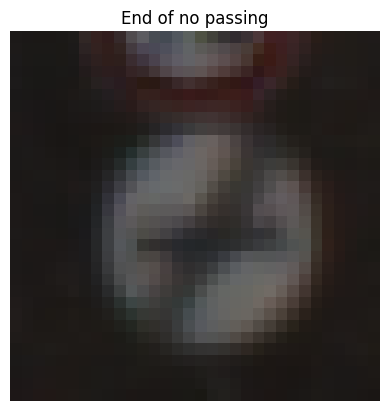

In [7]:
# Create a dictionary for label to sign name so that each sign has it own label and so it will be easier for us when we want to visualize the images
# label_map is the name of our dictionary, dict is the keyword we use when creating a dictionary, zip is used to pair the first item, ClassId, with its corresponding second item,SignName

label_map = dict(zip(sign_names['ClassId'], sign_names['SignName']))

# Pick one image
image = X_train[0]
label = y_train[0]

# imshow is a module from matplotlib used to show images.
# plt.axis('off') → hides the x/y axes so the image looks cleaner.
plt.imshow(image)
plt.title(label_map[label])
plt.axis('off')


In [8]:
# PHASE 2 Model Building
number_of_classes = len(sign_names)

model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    #Third Convolutional Block
    layers.Conv2D(128,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(number_of_classes, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model defined and compiled successfully.")

Model defined and compiled successfully.


In [9]:
# PHASE 3 Model Training
# Define training hyperparameters which are the epochs and the batch_size
# epochs are the number of times the entire training dataset is passed through the model during training.
# batch_size controls the number of images the model sees at a time before updating it's weight
epochs = 20
batch_size = 32

In [10]:
# Train the model using training data and validate using validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2442 - loss: 2.7960 - val_accuracy: 0.7934 - val_loss: 0.6373
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7782 - loss: 0.6845 - val_accuracy: 0.9256 - val_loss: 0.2622
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8877 - loss: 0.3504 - val_accuracy: 0.9544 - val_loss: 0.1788
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9246 - loss: 0.2413 - val_accuracy: 0.9639 - val_loss: 0.1391
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9374 - loss: 0.1893 - val_accuracy: 0.9662 - val_loss: 0.1232
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9520 - loss: 0.1499 - val_accuracy: 0.9664 - val_loss: 0.1252
Epoch 7/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9592 - loss: 0.1239 - val_accuracy: 0.9678 - val_loss: 0.1210
Epoch 8/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9639 - loss: 0.1156 -

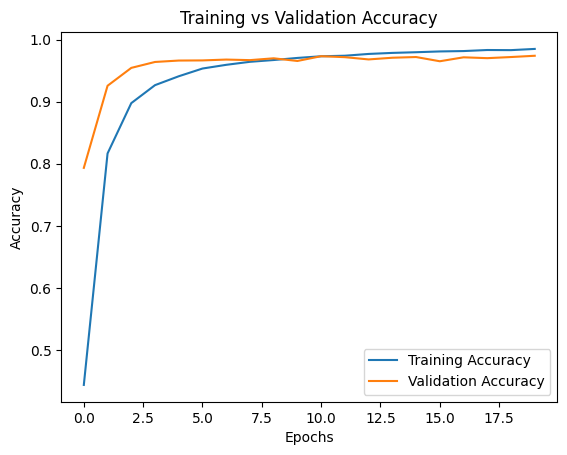

In [11]:
# Training visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

In [12]:
# Phase 4 Model Evaluation and Tuning
# Here we Evaluate the Model on the validation data
val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Loss: 0.1280
Validation Accuracy: 0.9739


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


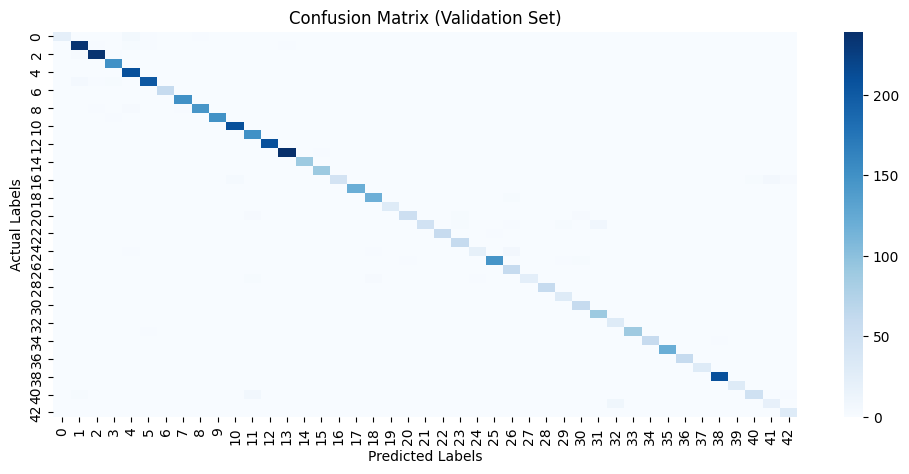

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get Predictions from the validation set to see how well it's performing so far
y_pred_valid = model.predict(X_valid)
y_pred_valid_classes = np.argmax(y_pred_valid, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_valid_classes)

plt.figure(figsize=(12, 5))
sns.heatmap(cm, cmap="Blues", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Validation Set)")
plt.show()


In [14]:
print(f"The model achieved an optimal accuracy of {val_accuracy:.4f} and since standard practices were followed further tuning could lead to overfitting hence we will use this model as it is and proceed to the test set evaluation")

The model achieved an optimal accuracy of 0.9739 and since standard practices were followed further tuning could lead to overfitting hence we will use this model as it is and proceed to the test set evaluation


In [15]:
# Phase 5: Test Evaluations
# This is the final evaluation on unseen test data
from sklearn.metrics import classification_report, accuracy_score
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Lost: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Lost: 0.2580
Test Accuracy: 0.9593


In [16]:
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
target_names = [label_map[i] for i in range(number_of_classes)]
print(classification_report(y_test, y_pred_test_classes, target_names=target_names))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
                                               precision    recall  f1-score   support

                         Speed limit (20km/h)       1.00      0.78      0.88        60
                         Speed limit (30km/h)       0.96      0.99      0.97       720
                         Speed limit (50km/h)       0.99      0.98      0.99       750
                         Speed limit (60km/h)       0.93      0.96      0.94       450
                         Speed limit (70km/h)       0.96      0.98      0.97       660
                         Speed limit (80km/h)       0.95      0.95      0.95       630
                  End of speed limit (80km/h)       0.99      0.77      0.86       150
                        Speed limit (100km/h)       0.98      0.91      0.95       450
                        Speed limit (120km/h)       0.94      0.97      0.95       450
                                   No passing       0.95      0.99      0.97       480
 

<function matplotlib.pyplot.show(close=None, block=None)>

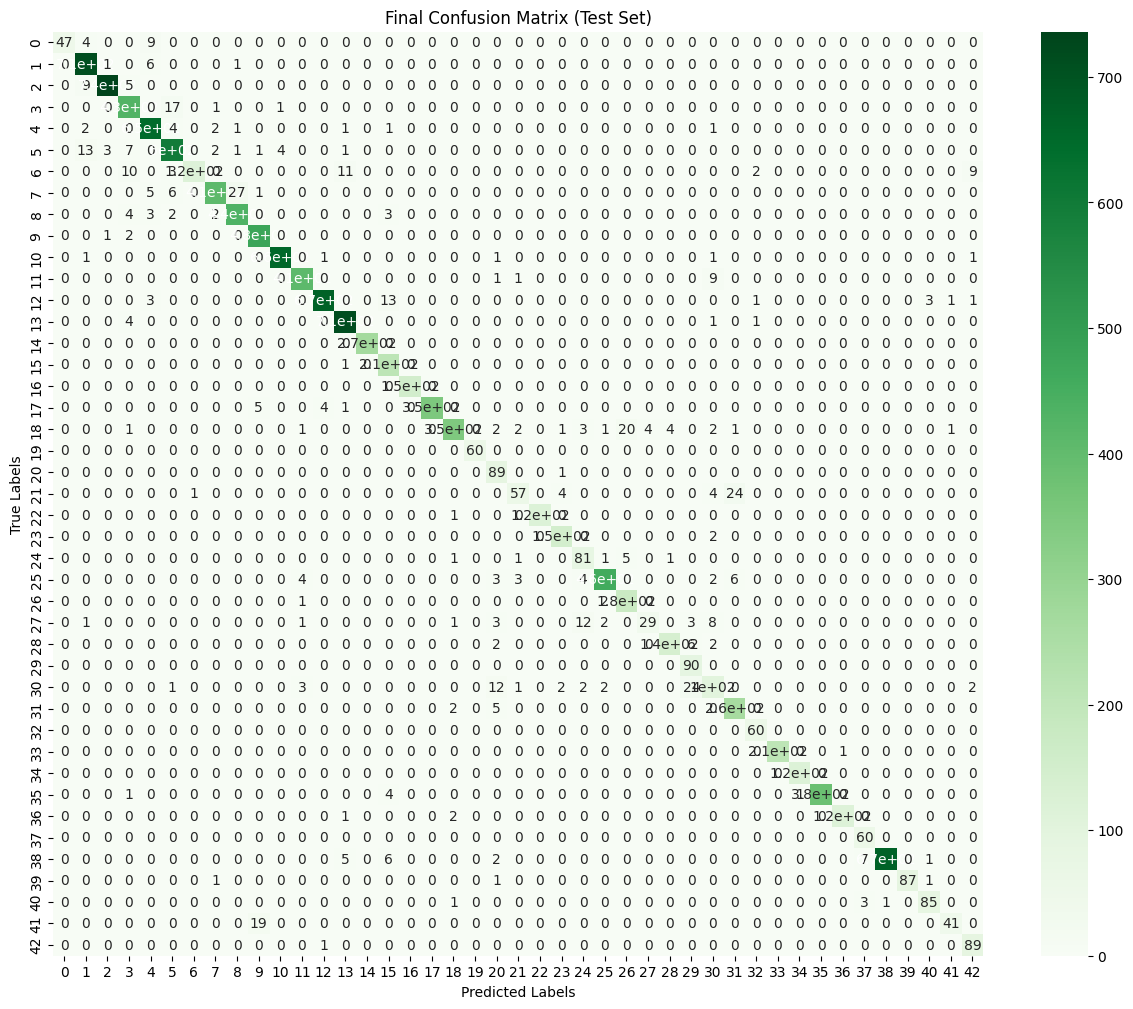

In [17]:
cm_test = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_test, annot=True, cmap="Greens", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Final Confusion Matrix (Test Set)")
plt.show

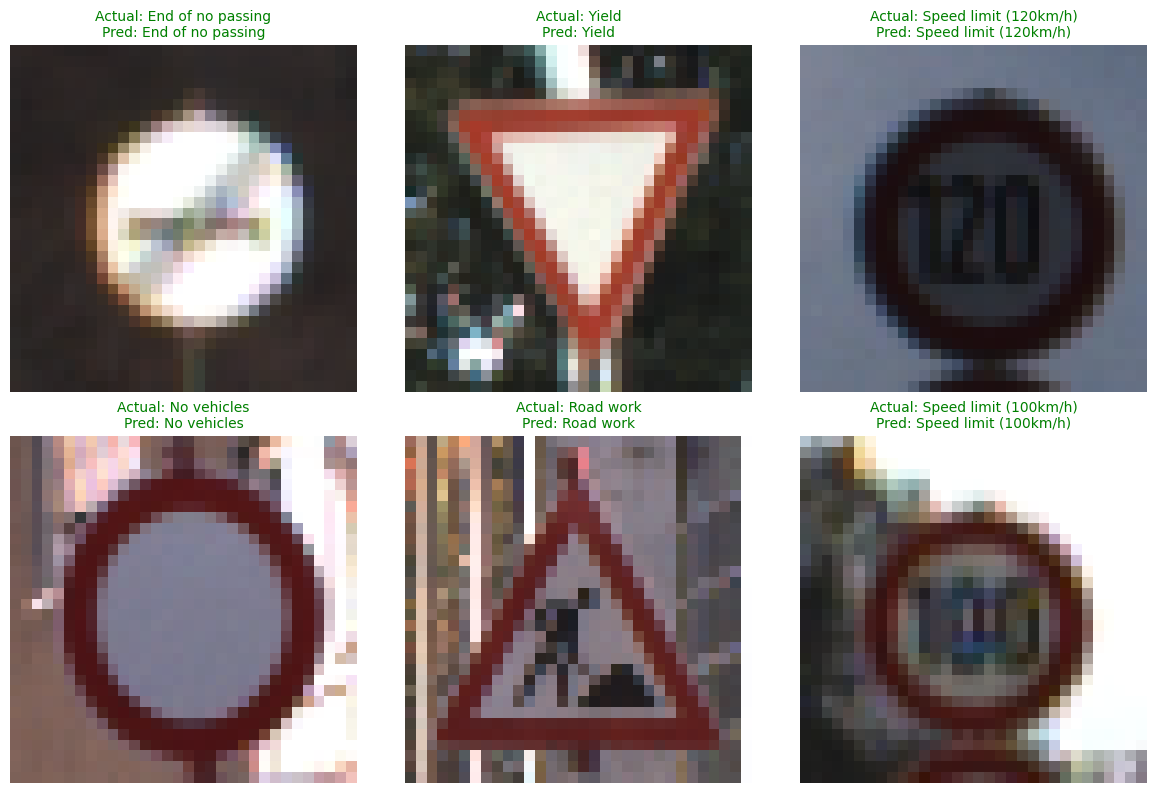

In [18]:
#Visualize Some Test Predictions
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # Pick a random image from the test set
    random_index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[random_index])

    actual = label_map[y_test[random_index]]
    predicted = label_map[y_pred_test_classes[random_index]]

    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPred: {predicted}", color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()



In [19]:
# Saving the Final Model
# Save in H5 format or SavedModel format for future use
model_path = 'traffic_sign_model.h5'
model.save(model_path)
print(f"Model saved successfully to: {model_path}")

Model saved successfully to: traffic_sign_model.h5
